<img src='ml_steps.jpeg'>

### Step 1: Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Step 2: Prepare Data (Data Science)

In [2]:
data = pd.read_csv("../data/Salary_Data.csv")
data.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [3]:
data.shape

(30, 2)

In [4]:
X = data["YearsExperience"].values
Y = data["Salary"].values

### Split data

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=8, random_state=0)

print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(22,) (8,) (22,) (8,)


In [7]:
xtrain

array([ 5.3,  7.9,  2.9,  5.1,  3.2,  4.5,  8.2,  6.8,  1.3, 10.5,  3. ,
        2.2,  5.9,  6. ,  3.7,  3.2,  9. ,  2. ,  1.1,  7.1,  4.9,  4. ])

In [8]:
ytrain

array([ 83088., 101302.,  56642.,  66029.,  64445.,  61111., 113812.,
        91738.,  46205., 121872.,  60150.,  39891.,  81363.,  93940.,
        57189.,  54445., 105582.,  43525.,  39343.,  98273.,  67938.,
        56957.])

In [9]:
xtest

array([ 1.5, 10.3,  4.1,  3.9,  9.5,  8.7,  9.6,  4. ])

In [10]:
ytest

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.])

In [11]:
xtrain.ndim, ytrain.ndim

(1, 1)

In [12]:
x_train_updated = xtrain.reshape(-1,1)
y_train_updated = ytrain.reshape(-1,1)

In [13]:
x_train_updated.ndim

2

In [14]:
x_train_updated[:2]

array([[5.3],
       [7.9]])

### Let's try to calculate m,b manually

In [15]:
def calculate_mb(x,y):
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/
        ((np.mean(x)**2)-np.mean(x**2)))
    b = np.mean(y)-m*np.mean(x)
    
    return m,b

calculate_mb(x_train_updated, y_train_updated)

(9379.710491946013, 26986.691316737262)

### Step 3: Train Model on training data

In [16]:
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(x_train_updated, y_train_updated)

LinearRegression()

In [18]:
lin_reg.coef_

array([[9379.71049195]])

In [19]:
lin_reg.intercept_

array([26986.69131674])

### Step 4: Prediction

In [20]:
xtest_updated = xtest.reshape(-1,1)
ytest_updated = ytest.reshape(-1,1)

y_prediction = lin_reg.predict(xtest_updated)
y_prediction

array([[ 41056.25705466],
       [123597.70938378],
       [ 65443.50433372],
       [ 63567.56223533],
       [116093.94099022],
       [108590.17259667],
       [117031.91203942],
       [ 64505.53328452]])

In [21]:
xtest_updated[0]*lin_reg.coef_+lin_reg.intercept_

array([[41056.25705466]])

In [22]:
xtest

array([ 1.5, 10.3,  4.1,  3.9,  9.5,  8.7,  9.6,  4. ])

### Step 5: Evaluation

In [23]:
df = pd.DataFrame()
df["Experience"] = xtest_updated.flatten()
df["Salary (Actual)"] = ytest_updated.flatten()
df["Salary (Predicted)"] = y_prediction.flatten()
df

Experience  Salary (Actual)  Salary (Predicted)
0         1.5          37731.0        41056.257055
1        10.3         122391.0       123597.709384
2         4.1          57081.0        65443.504334
3         3.9          63218.0        63567.562235
4         9.5         116969.0       116093.940990
5         8.7         109431.0       108590.172597
6         9.6         112635.0       117031.912039
7         4.0          55794.0        64505.533285

In [24]:
df["SSE"]=(df.iloc[:,1]-df.iloc[:,2])**2

In [25]:
print("MSE = ",df.iloc[:,3].sum()/len(df))

MSE =  22407940.143340684


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
mse = mean_squared_error(ytest_updated, y_prediction)
mse

22407940.143340684

In [28]:
r2_score(ytest_updated, y_prediction)

0.9779208335417602

In [42]:
def sum_of_squares(y_original, y_line):
    return sum((y_line-y_original)**2)

def coefficient_of_determination(y_orig, y_line):
    y_mean = []
    for i in y_orig:
        y_mean.append(np.mean(y_orig))

    squared_error_regr = sum_of_squares(y_orig, y_line)
    squared_error_mean = sum_of_squares(y_orig, y_mean)

    r2_score = 1-(squared_error_regr/squared_error_mean)
    return r2_score

In [43]:
coefficient_of_determination(ytest_updated, y_prediction)

array([0.97792083, 0.97792083, 0.97792083, 0.97792083, 0.97792083,
       0.97792083, 0.97792083, 0.97792083])

### Data Visualization

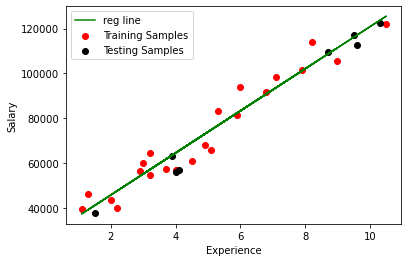

In [29]:
plt.scatter(xtrain, ytrain,color="red")
plt.scatter(xtest, ytest,color="black")
plt.plot(xtrain, lin_reg.predict(xtrain.reshape(-1,1)), color="green")
plt.legend(["reg line","Training Samples", "Testing Samples"])
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()